<a href="https://colab.research.google.com/github/sahuljr7/CV-Lab-7th-Semester/blob/main/exp_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
refFilename = "15.jpg"
print("Reading reference image: ", refFilename)
im1 = cv2.imread(refFilename, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

imFilename = "51.jpg"
print("Reading image to align : ", imFilename)
im2 = cv2.imread(imFilename, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

Reading reference image:  15.jpg
Reading image to align :  51.jpg


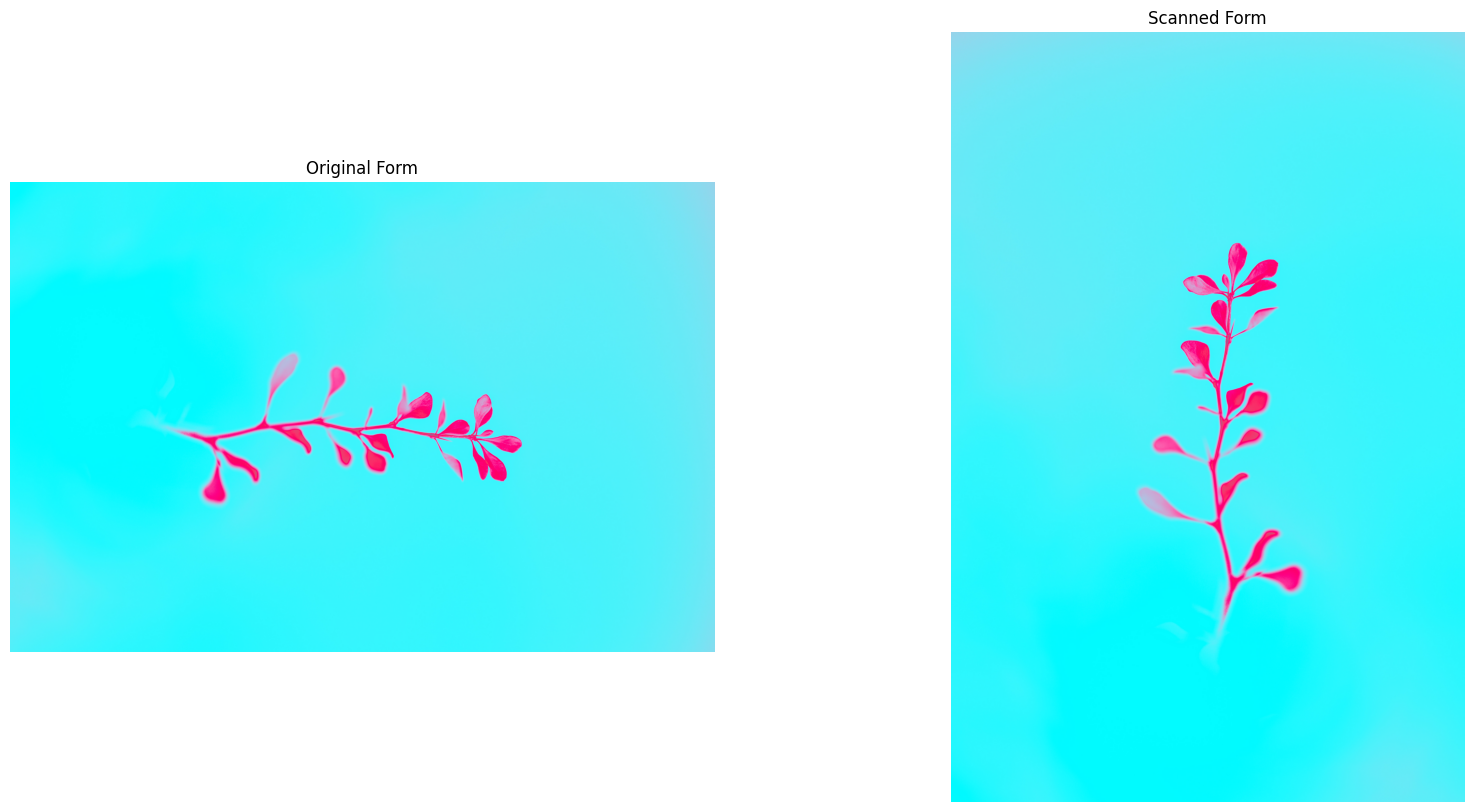

In [ ]:
# Display images
plt.figure(figsize=[20, 10])
plt.subplot(121)
plt.axis('off')
plt.imshow(im1)
plt.title("Original Form")

plt.subplot(122)
plt.axis('off')
plt.imshow(im2)
plt.title("Scanned Form")

plt.show()

In [ ]:
# Convert images to grayscale
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# Set the maximum number of features to detect
MAX_NUM_FEATURES = 500

# Initialize ORB detector
orb = cv2.ORB_create(MAX_NUM_FEATURES)

# Find keypoints and descriptors for both images
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)


In [ ]:
im1_display = cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]), color=(255, 100, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]), color=(255, 100, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

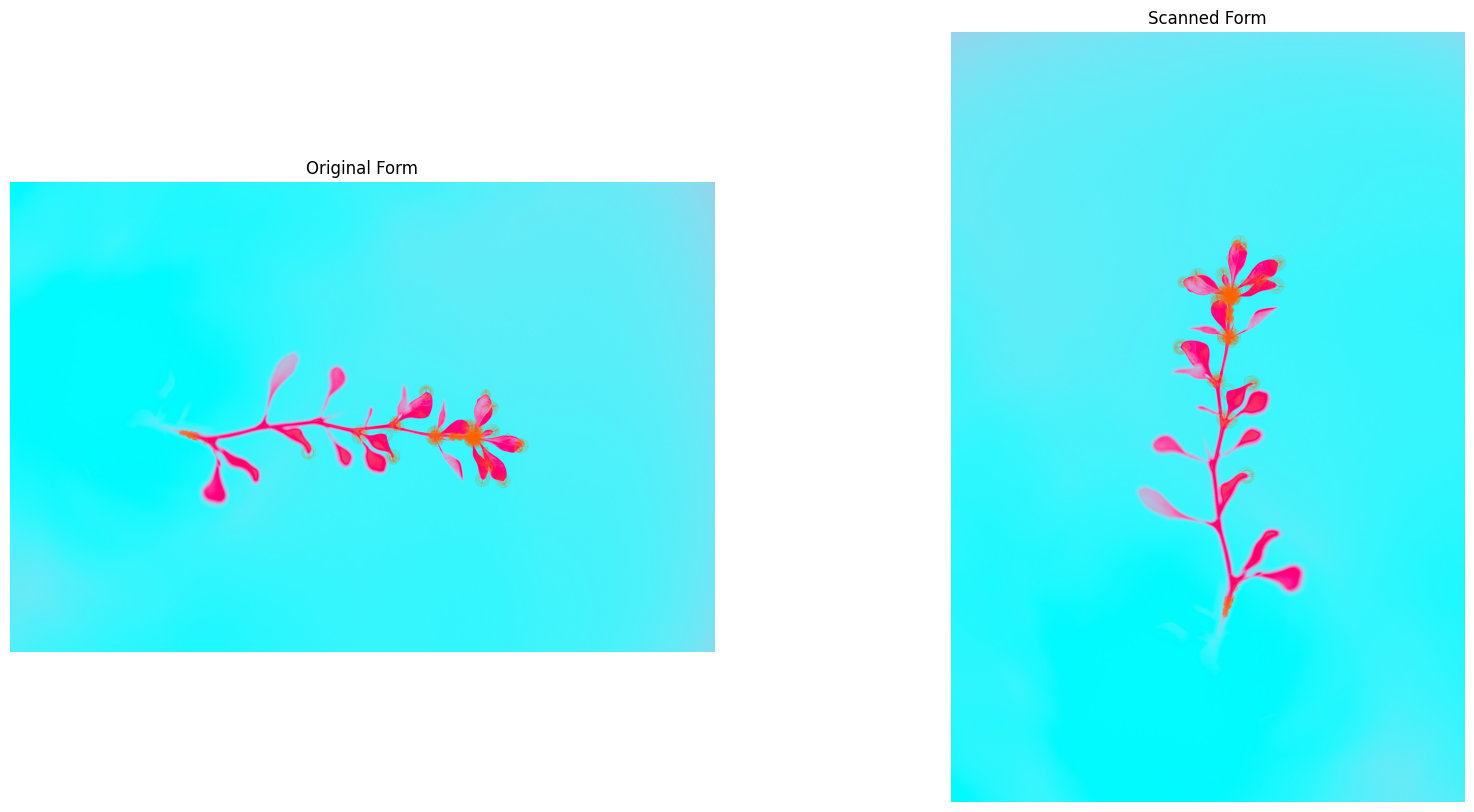

In [ ]:
# Create a figure with two subplots
plt.figure(figsize=[20, 10])

# Display the first image with keypoints
plt.subplot(121)
plt.axis('off')
plt.imshow(im1_display)
plt.title("Original Form")

# Display the second image with keypoints
plt.subplot(122)
plt.axis('off')
plt.imshow(im2_display)
plt.title("Scanned Form")

# Show the figure
plt.show()


In [ ]:
# Create a descriptor matcher (Brute-Force Hamming)
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# Match descriptors from the two images
matches = matcher.match(descriptors1, descriptors2, None)

# Convert the matches to a list for sorting
matches = list(matches)

# Sort the matches by distance (lower is better)
matches.sort(key=lambda x: x.distance, reverse=False)

# Select a percentage of the best matches (e.g., 10%)
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]


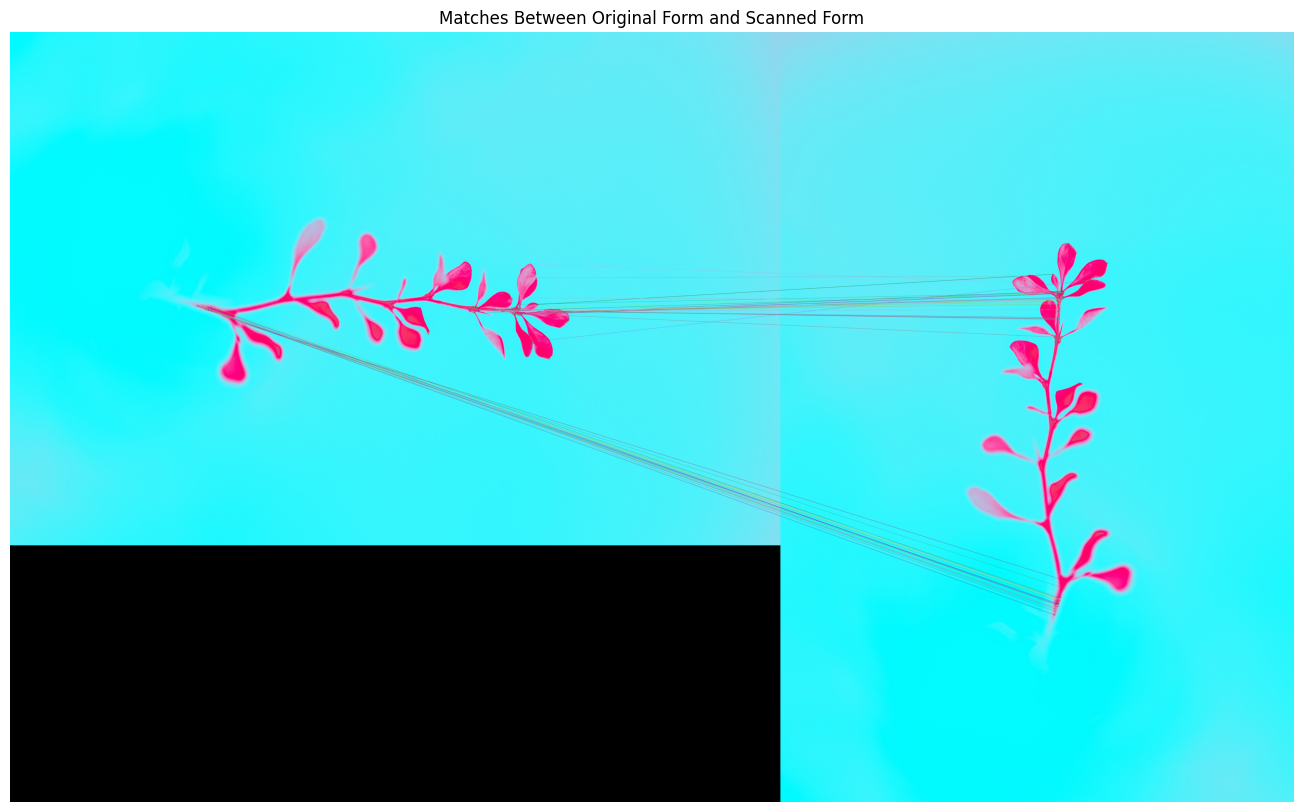

In [ ]:
# Draw the matches between the two images
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

# Create a figure for displaying the matches
plt.figure(figsize=[40, 10])

# Display the image with matches
plt.imshow(im_matches)
plt.axis('off')
plt.title("Matches Between Original Form and Scanned Form")

# Show the figure
plt.show()


In [ ]:
# Create arrays to store corresponding keypoints from matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

# Extract keypoints' coordinates from matches
for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Use RANSAC to find the homography matrix
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)


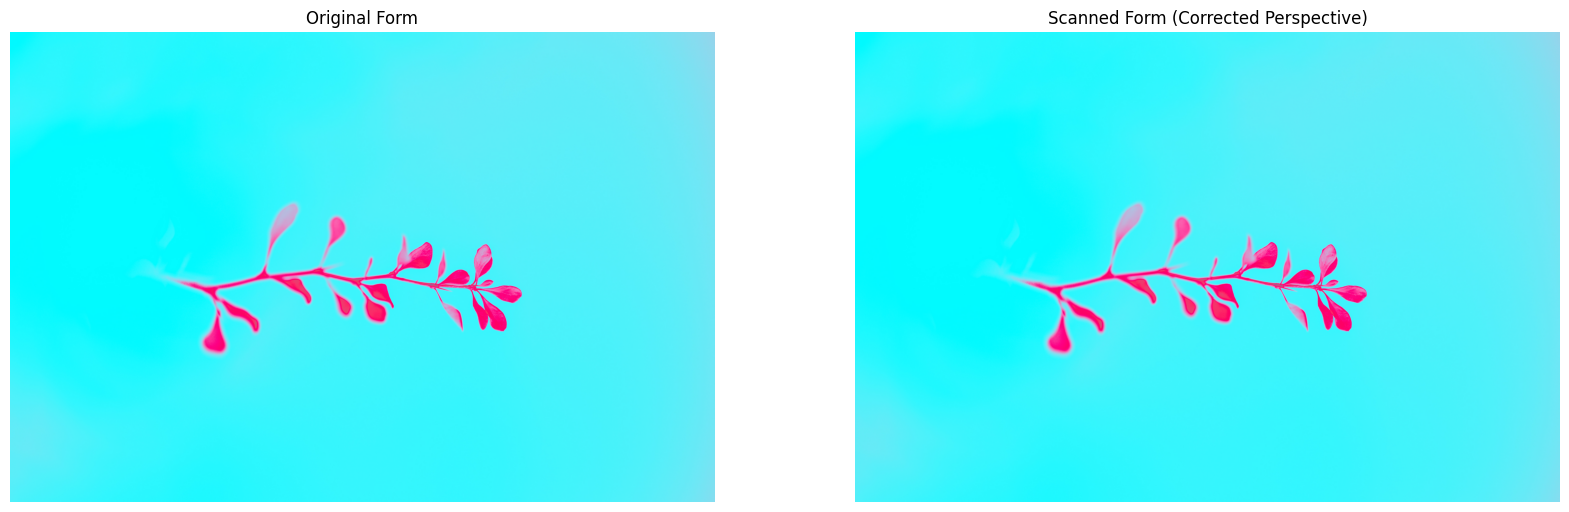

In [ ]:
# Get the height, width, and channels of the first image (im1)
height, width, channels = im1.shape

# Warp the second image (im2) onto the same perspective as the first image using the homography matrix (h)
im2_reg = cv2.warpPerspective(im2, h, (width, height))

# Create a figure for displaying the images side by side
plt.figure(figsize=[20, 10])

# Display the original form (im1)
plt.subplot(121)
plt.imshow(im1)
plt.axis('off')
plt.title("Original Form")

# Display the scanned form after perspective correction (im2_reg)
plt.subplot(122)
plt.imshow(im2_reg)
plt.axis('off')
plt.title("Scanned Form (Corrected Perspective)")

# Show the figure
plt.show()
